## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# define file path
path = r'C:\Users\krist\ATX Metro Bike'

In [3]:
# import dataset and check import
metrobikes = pd.read_pickle(os.path.join(path, '02.Data', 'PreparedData', 'metrobikes_cleaned.pkl'))
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,Checkout Name Current,Checkout Kiosk ID current,Checkout Kiosk Status,Checkout Kiosk Geographic Location,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,Toomey Rd @ South Lamar,2712.0,closed,"(30.26304, -97.75824)",0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,3rd & West,2552.0,active,"(30.2678, -97.75189)",13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,Dean Keeton & Speedway,3794.0,active,"(30.28953, -97.73695)",19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0


In [4]:
# check shape
metrobikes.shape

(1844301, 20)

## 2. Create new columns with day of month, hour, latitude, longitude

In [5]:
#create day of month column
metrobikes['Checkout Day of Month'] = metrobikes['Checkout Datetime'].dt.day
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Kiosk ID current,Checkout Kiosk Status,Checkout Kiosk Geographic Location,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,2496.0,active,"(30.2698, -97.74186)",14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,1
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,2495.0,active,"(30.26634, -97.74378)",15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,13
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,2712.0,closed,"(30.26304, -97.75824)",0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0,14
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,2552.0,active,"(30.2678, -97.75189)",13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,14
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,3794.0,active,"(30.28953, -97.73695)",19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0,13


In [6]:
# create hour of day column
metrobikes['Checkout Hour of Day'] = metrobikes['Checkout Datetime'].dt.hour
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Kiosk Status,Checkout Kiosk Geographic Location,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,active,"(30.2698, -97.74186)",14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,1,9
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,active,"(30.26634, -97.74378)",15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,13,16
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,closed,"(30.26304, -97.75824)",0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0,14,8
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,active,"(30.2678, -97.75189)",13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,14,8
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,active,"(30.28953, -97.73695)",19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0,13,16


In [7]:
#create checkout latitude column
metrobikes['Checkout Kiosk Latitude'] = metrobikes['Checkout Kiosk Geographic Location'].apply(lambda x: x.split('(')[1].split(',')[0])
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Kiosk Geographic Location,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,"(30.2698, -97.74186)",14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,1,9,30.2698
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,"(30.26634, -97.74378)",15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,13,16,30.26634
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,"(30.26304, -97.75824)",0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0,14,8,30.26304
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,"(30.2678, -97.75189)",13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,14,8,30.2678
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,"(30.28953, -97.73695)",19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0,13,16,30.28953


In [8]:
#create checkout longitude column
metrobikes['Checkout Kiosk Longitude'] = metrobikes['Checkout Kiosk Geographic Location'].apply(lambda x: x.split(',')[1].split(')')[0])
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,1,9,30.2698,-97.74186
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,13,16,30.26634,-97.74378
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0,14,8,30.26304,-97.75824
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,14,8,30.2678,-97.75189
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0,13,16,30.28953,-97.73695


In [9]:
#create return latitude column
metrobikes['Return Kiosk Latitude'] = metrobikes['Return Kiosk Geographic Location'].apply(lambda x: x.split('(')[1].split(',')[0])
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,1,9,30.2698,-97.74186,30.26634
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,13,16,30.26634,-97.74378,30.26634
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0,14,8,30.26304,-97.75824,30.26446
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,14,8,30.2678,-97.75189,30.2698
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0,13,16,30.28953,-97.73695,30.25941


In [10]:
#create return longitude column
metrobikes['Return Kiosk Longitude'] = metrobikes['Return Kiosk Geographic Location'].apply(lambda x: x.split(',')[1].split(')')[0])
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,2495.0,active,"(30.26634, -97.74378)",15.0,1,9,30.2698,-97.74186,30.26634,-97.74378
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,2495.0,active,"(30.26634, -97.74378)",15.0,13,16,30.26634,-97.74378,30.26634,-97.74378
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,2575.0,active,"(30.26446, -97.75665)",15.0,14,8,30.26304,-97.75824,30.26446,-97.75665
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,2496.0,active,"(30.2698, -97.74186)",14.0,14,8,30.2678,-97.75189,30.2698,-97.74186
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,2549.0,active,"(30.25941, -97.74971)",13.0,13,16,30.28953,-97.73695,30.25941,-97.74971


### 2b. Check that new column datatypes are numeric for correlation analysis

In [11]:
#check that new column datatypes are numeric
metrobikes.dtypes

Trip ID                                        int64
Membership Type                             category
Bicycle ID                                    object
Bike Type                                   category
Checkout Datetime                     datetime64[ns]
Checkout Date                         datetime64[ns]
Checkout Time                                 object
Trip Time mins                                 int64
Month                                          int64
Year                                           int64
Checkout Name Current                         object
Checkout Kiosk ID current                    float64
Checkout Kiosk Status                         object
Checkout Kiosk Geographic Location            object
Checkout Kiosk Dock Count                    float64
Return Name Current                           object
Return Kiosk ID current                      float64
Return Kiosk Status                           object
Return Kiosk Geographic Location              

In [12]:
#create list of columns to change to floats
lat_lon_cols = ['Checkout Kiosk Latitude', 'Checkout Kiosk Longitude', 
                'Return Kiosk Latitude', 'Return Kiosk Longitude']

#change datatypes to floats
metrobikes[lat_lon_cols] = metrobikes[lat_lon_cols].astype('float32')

#check for change
metrobikes[lat_lon_cols].dtypes

Checkout Kiosk Latitude     float32
Checkout Kiosk Longitude    float32
Return Kiosk Latitude       float32
Return Kiosk Longitude      float32
dtype: object

## 3. Create aggregated variables for 
### a. number of  trips , average trip time, and number of bikes available each year
### b. average trip time each and number of trips each month
### c. average trip time each and number of trips each day of the week

In [13]:
#create dataframe for yearly info
Trip_Info_Yr = metrobikes.groupby([metrobikes['Checkout Datetime'].dt.year]).agg({'Trip ID': ['count'],
                                                                                 'Trip Time mins': ['mean'],
                                                                                 'Bicycle ID': ['nunique']})
Trip_Info_Yr

,Trip ID,Trip Time mins,Bicycle ID
,count,mean,nunique
Checkout Datetime,,,
2013,1411,37.513820,84
2014,139241,26.610912,377
2015,167931,24.094557,393
2016,163546,26.938170,397
2017,157256,29.974430,430
2018,364821,18.301139,586
2019,100210,23.478914,547
2020,97092,32.311746,700


In [14]:
#create dataframe for monthly info
Trip_info_Month = metrobikes.groupby([metrobikes['Checkout Datetime'].dt.month]).agg({'Trip Time mins': ['mean'], 
                                                                                           'Trip ID': ['count']})
Trip_info_Month

,Trip Time mins,Trip ID
,mean,count
Checkout Datetime,,
1,24.057053,95438
2,22.660457,124267
3,23.081985,245141
4,23.130320,215938
5,25.754709,176541
6,25.639354,139827
7,25.417591,138286
8,22.954054,118597


In [15]:
#create dataframe for weekly info
Trip_info_DayofWk = metrobikes.groupby([metrobikes['Checkout Datetime'].dt.weekday]).agg({'Trip ID': ['count'], 
                                                                                           'Trip Time mins': ['mean']})
Trip_info_DayofWk

,Trip ID,Trip Time mins
,count,mean
Checkout Datetime,,
0,246017,20.711613
1,231214,18.835905
2,232930,18.652153
3,243040,19.644400
4,278226,22.913861
5,328871,29.606572
6,284003,28.506139


## 4. Explore correlations for yearly trip information

In [16]:
#check column names for ease when creating correlations
Trip_Info_Yr.columns

MultiIndex([(       'Trip ID',   'count'),
            ('Trip Time mins',    'mean'),
            (    'Bicycle ID', 'nunique')],
           )

In [17]:
# Update column names for ease of use
Trip_Info_Yr.columns = ['Trips Taken', 'Avg Trip Time', 'Num Bikes']
Trip_Info_Yr.columns

Index(['Trips Taken', 'Avg Trip Time', 'Num Bikes'], dtype='object')

In [18]:
# view correlations for yearly trip information 
Trip_Info_Yr.corr()

,Trips Taken,Avg Trip Time,Num Bikes
Trips Taken,1.000000,-0.789962,0.547297
Avg Trip Time,-0.789962,1.000000,-0.489711
Num Bikes,0.547297,-0.489711,1.000000


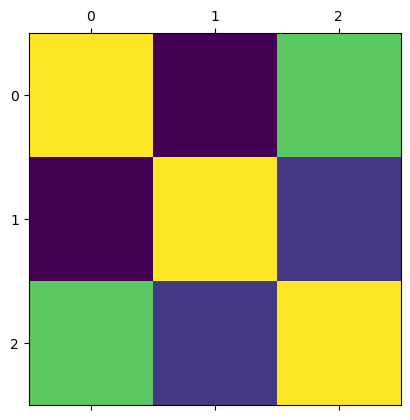

In [19]:
# show visual of year information matrix
plt.matshow(Trip_Info_Yr.corr())
plt.show()

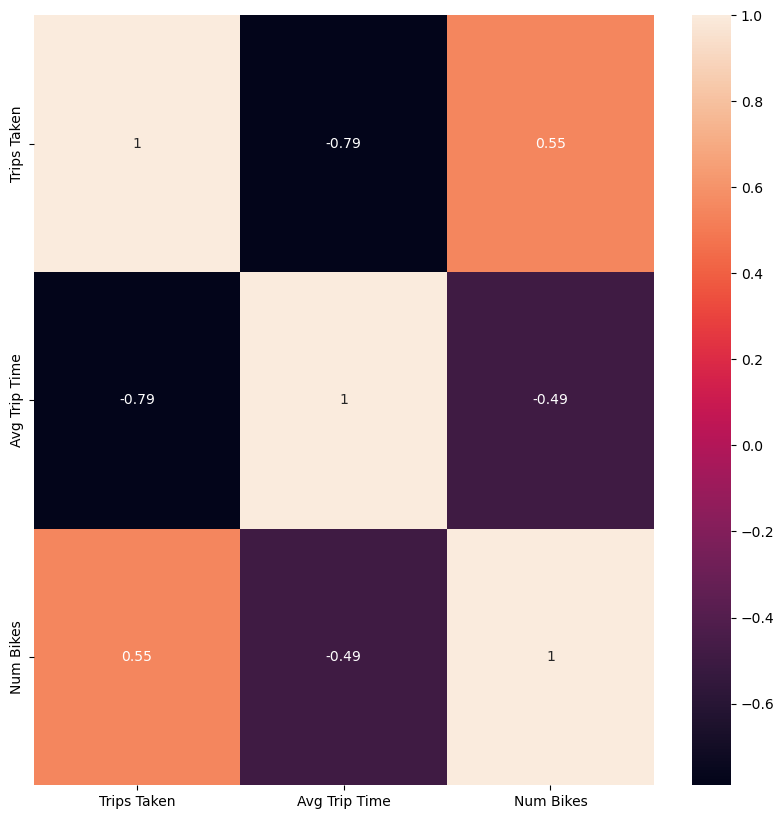

In [20]:
#create figure
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(Trip_Info_Yr.corr(), annot = True, ax = ax)

### There is a strong negative correlation between the number of trips taken in a year and the average trip time
### There is a strong positive correlation between the number of trips taken in a year and the number of bicycles available 
### There is a moderate negative correlation between the number of bicycles available in a year and the average trip time

## 4. Scatterplot for yearly trip information 

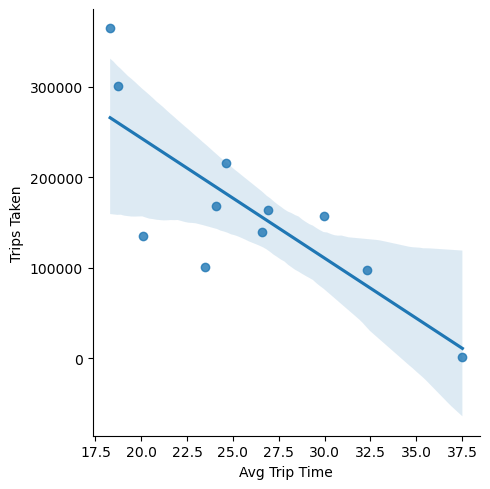

In [21]:
# Create a scatterplot for the trip time and number of trips taken in a year
sns.lmplot(x = 'Avg Trip Time', y = ('Trips Taken') , data = Trip_Info_Yr)

### as the average trip time increases, the number of trips taken decreases

## 5. Pair Plot

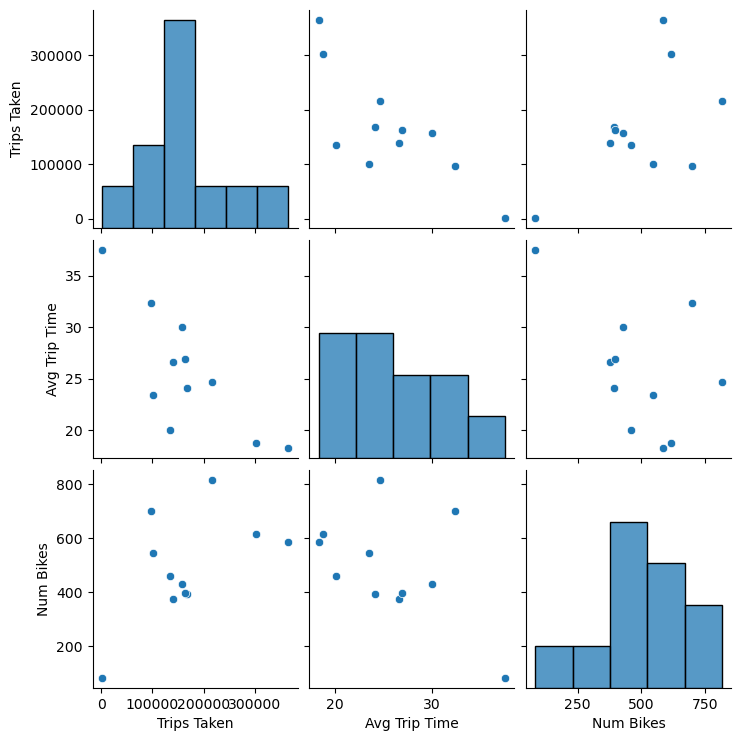

In [22]:
# Create a plots for the average trip time, total trips taken in a year, and total bikes available in a year
sns.pairplot(Trip_Info_Yr)

### this supports that fewer trips are taken at longer trip times. the other graphs somewhat reinforce what we saw in the correlations but the data is very scattered throughout when looking at the number of bikes and trips taken and the number of bikes and the average trip time. 

## 6. Histogram

<Axes: xlabel='Trip Time mins', ylabel='Count'>

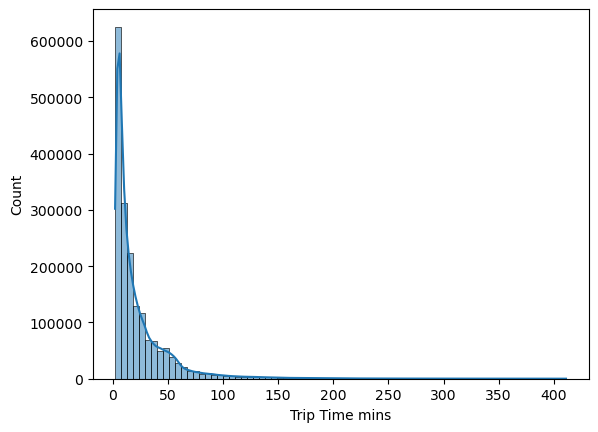

In [24]:
#create histogram of trip time
sns.histplot(metrobikes['Trip Time mins'], bins = 75, kde = True)

## 7. CatPlot

In [42]:
#create short trip <= 10 minutes; typical trip >10 and <= 30; unusual trip >30 minutes
metrobikes.loc[metrobikes['Trip Time mins'] <= 5, 'Trip Time Category'] = 'Short trip'

In [43]:
metrobikes.loc[(metrobikes['Trip Time mins'] > 5) & (metrobikes['Trip Time mins'] <= 30),
               'Trip Time Category'] = 'Typical Trip'

In [44]:
metrobikes.loc[metrobikes['Trip Time mins'] > 30, 'Trip Time Category'] = 'Unusual trip'

In [45]:
#check category counts
metrobikes['Trip Time Category'].value_counts()

Typical Trip    1012278
Unusual trip     421607
Short trip       410416
Name: Trip Time Category, dtype: int64

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


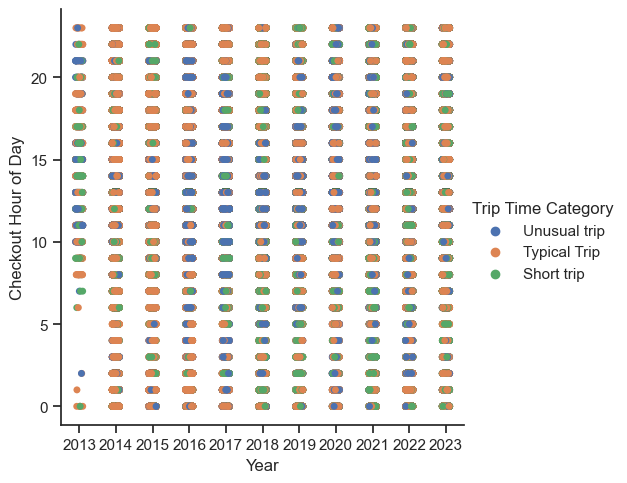

In [46]:
# Create a categorical plot in seaborn using the time categories created above
sns.set(style= 'ticks')
sns.catplot(x= 'Year', y='Checkout Hour of Day', hue='Trip Time Category', data=metrobikes)

### the year with the most unusually long trips appears to be 2016, followed by 2017. most unusually long trips have checkout times between 10AM and 2PM. 2019 and after the occurance of unusually long trips looks lower. 

## 8. Export dataset

In [47]:
#check shape before export
metrobikes.shape

(1844301, 27)

In [49]:
#export file
metrobikes.to_pickle(os.path.join(path, 
                                  '02.Data', 
                                  'PreparedData', 
                                  'metrobikes_viz_eda.pkl'))